# 1. Introduction & Business Understanding
---

Asuransi kesehatan adalah salah satu hal yang patut diperhatikan karena bersangkutan dengan kebutuhan perencanaan masa depan. Pengguna asuransi kesehatan diwajibkan untuk membayar besaran uang secara rutin (premi) kepada pihak perusahaan asuransi. Premi tersebut diolah oleh perusahaan asuransi untuk membayarkan tagihan kesehatan pengguna yang tertanggung. Penentuan nilai premi menjadi tantangan tersendiri bagi pihak asuransi mengingat ada banyak faktor yang dapat mempengaruhi & meningkatkan profil resiko pengguna.

Project ini dibuat untuk menjawab menganalisa variable-variabel yang memiliki hubungan dengan tagihan kesehatan yang diterima oleh setiap pengguna. Anda akan diberikan data yang berisi data personal pengguna seperti umur, gender, tempat tinggal pengguna, banyak anak tertanggung asuransi, nilai bmi, keadaan merokok atau tidaknya pengguna.

Metadata sebagai berikut:

1. `age`: umur peserta asuransi
1. `sex`: jenis kelamin
1. `bmi`: body mass index dari peserta
1. `children`: banyak anak/ tanggungan dari peserta
1. `smoker`: apakah peserta perokok/tidak
1. `region`: lokasi/ region dari peserta (US)
1. `charges`: tagihan kesehatan peserta.

# 2. Data Understanding
---

## Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
# import hvplot.pandas

sns.set_theme(style='white', palette='tab20') #setting theme

## Importing Dataset

In [ ]:
insurance = pd.read_csv('insurance.zip')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 1. Analisa Descriptive Statistics

### 1.1 Rata-rata umur pengguna

39.20702541106129

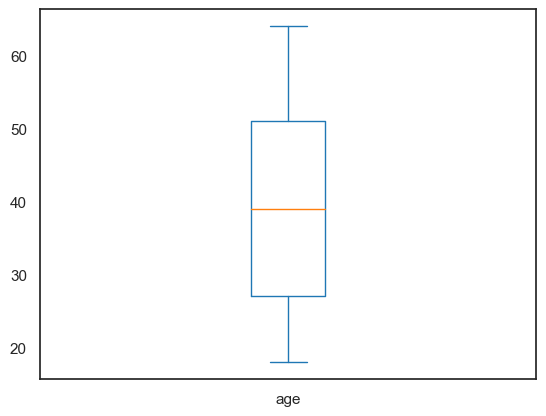

In [ ]:
insurance.age.plot(kind='box');

insurance.age.mean()

- Rerata umur pengguna asuransi adalah 39

### 1.2. Rata-rata nilai BMI dari pengguna yang merokok

In [ ]:
insurance.groupby('smoker').bmi.mean()

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

- Rerata BMI perokok adalah 30.7, sementara BMI non-perokok adalah 30.65. Tidak banyak perbedaan

### 1.3. Berapa Rata-rata umur perokok

In [ ]:
insurance.groupby('smoker').age.mean()

smoker
no     39.385338
yes    38.514599
Name: age, dtype: float64

- Rerata umur orang yang merokok adalah 38.51. 

### 1.4. Berapa rata-rata nilai BMI dari yang Merokok? 

In [ ]:
insurance.groupby('smoker').bmi.mean()

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

- Rata-rata nilai `BMI` dari perokok adalah 30.71

### 1.5 Apakah variansi dari data charges perokok dan non-perokok sama?

In [ ]:
(insurance
 .groupby('smoker')
 .charges
 .agg([np.var])
 .round()
)

,var
smoker,
no,35925420.0
yes,133207311.0


In [ ]:
insurance.groupby('smoker').charges.var()/35925420.0*100

smoker
no     100.000001
yes    370.788459
Name: charges, dtype: float64

- Variansi perokok dan non perokok sangat berbeda. Nilai variansi `charges` perokok adalah 370% lebih tinggi daripada non-perokok. 

### 1.6. Rata-rata umur perempuan dan laki-laki yang merokok

In [ ]:
(insurance
 .query("smoker == 'yes'")
 .groupby('sex')
 .age
 .mean()
)

sex
female    38.608696
male      38.446541
Name: age, dtype: float64

- Rerata umur perokok perempuan adalah 38.61, dan laki-laki adalah 38.45. 
- Perbedaan rerata umur perokok beda kelamin sangat kecil. 

### 1.7. Mana yang lebih tinggi, rata-rata tagihan kesehatan `charges` perokok atau non-perokok?

In [ ]:
(insurance
 .groupby('smoker')
 .charges
 .mean()
)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [ ]:
(insurance
 .groupby('smoker')
 .charges
 .mean()
 /8434.268298
 *100
)

smoker
no     100.000000
yes    380.000146
Name: charges, dtype: float64

- Tagihan kesehatan `charges` perokok adalah `380%` lebih tinggi dibandingkan dengan non-perokok. 

### 1.8. Mana yang lebih tinggi, rata-rata tagihan kesehatan `charges` perokok yang BMI-nya di atas 25 atau non-perokok yang BMI-nya di atas 25?

In [ ]:
(insurance
 .query("bmi > 25")
 .groupby('smoker')
 .charges
 .mean()
)

smoker
no      8629.589610
yes    35116.909657
Name: charges, dtype: float64

- Lebih tinggi tagihan perokok dengan bmi di atas 25, dibandingkan non-perokok dengan bmi di atas 25. 

#### 1.9. BMI mana yang lebih tinggi, seorang laki-laki atau perempuan?

In [ ]:
(insurance
 .groupby('sex')
 .bmi
 .mean()
)

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

- BMI yang lebih tinggi adalah laki-laki, walaupun selisihnya cuma 0.6 kilogram saja. Sangat kecil.

### 1.10. BMI mana yang lebih tinggi, seorang perokok atau non-perokok?

In [ ]:
(insurance
 .groupby('smoker')
 .bmi
 .mean()
)

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

- `BMI` perokok lebih tinggi daripada non-perokok, namun selisihnya sangatlah kecil (0.05 kilogram saja)

## 2. Analisa Variable Kategorik (PMF)

### 2.1. Gender mana yang memiliki tagihan paling tinggi? Female / Male?

In [ ]:
(insurance
 .groupby('sex')
 .charges
 .mean()
)

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

- Gender laki-laki memiliki rerata tagihan kesehatan paling tinggi. 

### 2.2. Distribusi peluang tagihan di tiap-tiap region

In [ ]:
insurance.groupby('region').charges.count()/len(insurance)

region
northeast    0.242152
northwest    0.242900
southeast    0.272048
southwest    0.242900
Name: charges, dtype: float64

- Distribusi peluang tagihan masing-masing region terlihat tidak jauh berbeda

### 2.3. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [ ]:
insurance.groupby('region').charges.count()/len(insurance)*100

region
northeast    24.215247
northwest    24.289985
southeast    27.204783
southwest    24.289985
Name: charges, dtype: float64

- Berdasarkan distribusi statistik di atas, proporsi data banyak orang di tiap region mirip satu sama lain, dengan perbedaan sangat sedikit (maksimal 12%).

### 2.4. Mana yang lebih tinggi, proporsi perokok/ non-perokok?

In [ ]:
insurance.groupby('smoker').smoker.count()

smoker
no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
insurance.query("smoker == 'yes'").smoker.count()/len(insurance)*100

20.47832585949178

- Lebih besar proporsi data non-perokok (80%) dibandingkan perokok (20%).

### 2.5. Berapa peluang seseorang tersebut adalah perempuan bila diketahui dia adalah perokok?

Peluang seseorang adalah `perempuan` bila diketahui dia adalah `perokok`, berarti menggunakan ruang sample semua pengguna yang merokok, kemudian dicari peluang perempuan.

$$ P(perempuan|perokok)=\frac {n(perempuan \cap perokok)} {n(perokok)} $$

In [ ]:
n_perokok = \
insurance.query("smoker == 'yes' ").smoker.count()

n_perokok

274

In [ ]:
n_perempuan_dan_perokok = \
insurance.query("smoker == 'yes' & sex == 'female'").sex.count()

n_perempuan_dan_perokok

115

In [ ]:
peluang_perempuan_bila_perokok = n_perempuan_dan_perokok/n_perokok

peluang_perempuan_bila_perokok.round(2)*100

42.0

- Bila seseorang merokok, maka 42% seseorang tersebut adalah perempuan.

### 2.6. Berapa peluang seseorang tersebut adalah laki-laki, bila diketahui dia adalah perokok?

Menggunakan prinsip yang sama, maka peluang seseorang tersebut laki-laki bila diketahui dia adalah perokok, adalah 1- peluang_perempuan_bila_perokok. 1-0.42 = 0.58 atau 58%.

Dapat dibuktikan sebagai berikut

In [ ]:
n_laki2_dan_perokok = \
insurance.query("smoker == 'yes' & sex == 'male'").sex.count()

n_laki2_dan_perokok

159

In [ ]:
peluang_laki2_bila_perokok = n_laki2_dan_perokok/n_perokok

peluang_laki2_bila_perokok.round(2)

0.58

### 2.7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

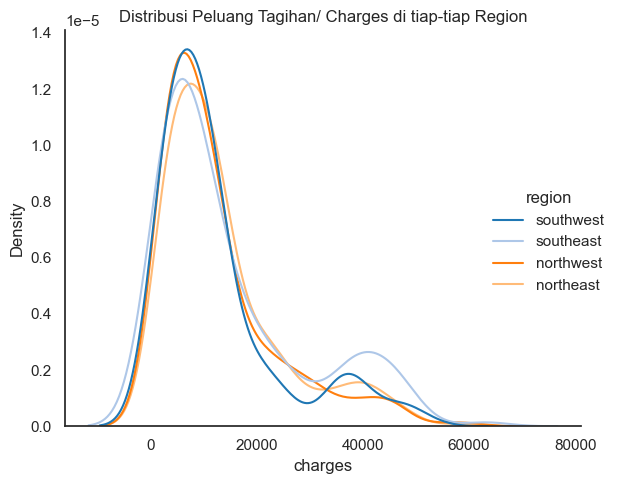

In [ ]:
(sns
 .displot(
     insurance,
     x='charges',
     kind='kde',
     hue='region',
     )
)

plt.title('Distribusi Peluang Tagihan/ Charges di tiap-tiap Region')
plt.tight_layout()
plt.show()

- Pada rentang charges di bawah 30,000, distribusi peluang setiap region relatif seimbang/mirip. Namun ketika nilai charges di atas 30,000 nilai peluang relatif berbeda satu sama lain region, terutama southeast region.

## 3. Analisa Variabel Kontinu

### 3.1. Mana yang lebih mungkin terjadi?

"Kejadian yang Lebih mungkin terjadi" adalah kejadian yang memiliki nilai peluang yang lebih besar dibandingkan kejadian lainnya. Untuk mendapatkan hal tersebut, maka dapat dilakukan perhitungan peluang masing-masing kejadian (a dan b), kemudian dibandingkan.

a. Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k?

Ada dua kondisi berdasarkan kejadian a, yakni:
- Seseorang dengan BMI>25
- Seseorang dengan charges > 16.7k

Maka, peluang seseorang dengan kondisi BMI > 25 mendapatkan tagihan di atas 16.7K adalah:

In [ ]:
n_bmi_lebih25 = \
(insurance
 .query("bmi > 25")
 .bmi
 .count()
)

n_bmi_lebih25

1091

In [ ]:
n_charges_diatas167k_bila_bmilebih25 = \
(insurance
 .query("charges > 16700 & bmi > 25")
 .charges
 .count()
)

n_charges_diatas167k_bila_bmilebih25

283

In [ ]:
peluang_bmilebih25_charges167k = \
n_charges_diatas167k_bila_bmidiatas25/n_bmi_kurangdari25

print(f"""
    Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan
    di atas 16.7k adalah sebesar {peluang_bmilebih25_charges167k.round(2)*100}%"""
)


    Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan
    di atas 16.7k adalah sebesar 26.0%


b. Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k?

In [ ]:
n_bmi_kurang25 = \
(insurance
 .query("bmi < 25")
 .bmi
 .count()
)

n_bmi_kurang25

245

In [ ]:
n_charges_diatas167k_bila_bmikurang25 = \
(insurance
 .query("bmi < 25 & charges > 16700")
 .charges
 .count()
)

n_charges_diatas167k_bila_bmikurang25

51

In [ ]:
peluang_bmikurang25_charges167k = \
n_charges_diatas167k_bila_bmikurang25/n_bmi_kurang25

print(f"""
    Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan
    di atas 16.7k adalah sebesar {peluang_bmikurang25_charges167k.round(2)*100}%"""
)


    Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan
    di atas 16.7k adalah sebesar 21.0%


- Peluang kejadian a sebesar 26%, lebih besar dibandingkan peluang b 21%. Sehingga kejadian a, yakni **Seseorang dengan BMI di atas 25 lebih mungkin mendapatkan tagihan kesehatan sebesar 16.7k dibandingkan ketika BMI di bawah 25**

### 3.2. Mana yang lebih mungkin terjadi?

a. Seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k?

Terdapat tiga kondisi, yakni:
- Perokok dan BMI di atas 25
- Tagihan kesehatan 16.7k

Sehingga perhitungan peluang dapat dilakukan sebagai berikut:


In [ ]:
n_perokok_bmilebih25 = \
(insurance
 .query("bmi>25 & smoker == 'yes'")
 .bmi
 .count()
)

n_perokok_bmilebih25

219

In [ ]:
n_perokok_bmilebih25_charges167k = \
(insurance
 .query("bmi>25 & smoker=='yes' & charges>16700")
 .bmi
 .count()
)

n_perokok_bmilebih25_charges167k

215

In [ ]:
peluang_perokok_bmilebih25_charges167k = \
n_perokok_bmilebih25_charges167k/n_perokok_bmilebih25


print(f"""
    Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan
    di atas 16.7k adalah sebesar {peluang_perokok_bmilebih25_charges167k.round(2)*100}%"""
)


    Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan
    di atas 16.7k adalah sebesar 98.0%


b. Seseorang non-perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k?

In [ ]:
n_nonperokok_bmilebih25 = \
(insurance
 .query("bmi>25 & smoker == 'no'")
 .bmi
 .count()
)

n_nonperokok_bmilebih25

872

In [ ]:
n_nonperokok_bmilebih25_charges167k = \
(insurance
 .query("bmi>25 & smoker=='no' & charges>16700")
 .bmi
 .count()
)

n_nonperokok_bmilebih25_charges167k

68

In [ ]:
peluang_nonperokok_bmilebih25_charges167k = \
n_nonperokok_bmilebih25_charges167k/n_nonperokok_bmilebih25


print(f"""
    Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan
    di atas 16.7k adalah sebesar {peluang_nonperokok_bmilebih25_charges167k.round(2)*100}%"""
)


    Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan
    di atas 16.7k adalah sebesar 8.0%


- Peluang seorang perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k adalah sebesar 98%. Sedangkan peluang non-perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k adalah sebesar 8%.

## 4. Analisa Korelasi Variabel

Analisa korelasi tagihan kesehatan dengan minimal 2 variabel lainnya.

Berdasarkan beragam variabel yang tersedia, penulis memutuskan untuk melihat hubungan tagihan/ charges dengan tiga variabel lain yakni:

1. Hubungan charges dengan umur (age)
2. HUbungan charges dengan status perokok/ non-perokok
3. Hubungan charges dengan BMI/ kelas BMI


Untuk mempermudah analisis, nilai BMI akan dikelompokkan berdasarkan tabel di bawah: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

| BMI            | Weight Status  |
|----------------|----------------|
| Below 18.5     | Underweight    |
| 18.5 – 24.9    | Healthy Weight |
| 25.0 – 29.9    | Overweight     |
| 30.0 and Above | Obesity        |



In [ ]:
#membuat kelas BMI dari data
bins= [0,18.49,24.9,30,100] #setting up the group based on bmi bins 

labels = ['underweight','healthy','overweight','obese'] #setting up the label on each group

insurance['bmi_class']= pd.cut(insurance['bmi'], bins=bins, labels=labels,include_lowest=False)

insurance

,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [ ]:
#sanity check on bmi_class

(insurance
 .groupby('bmi_class')
 [['bmi', 'bmi_class']]
 .agg(['min', 'max', 'count'])
 .style.background_gradient()
 # .style.text_gradient()
)

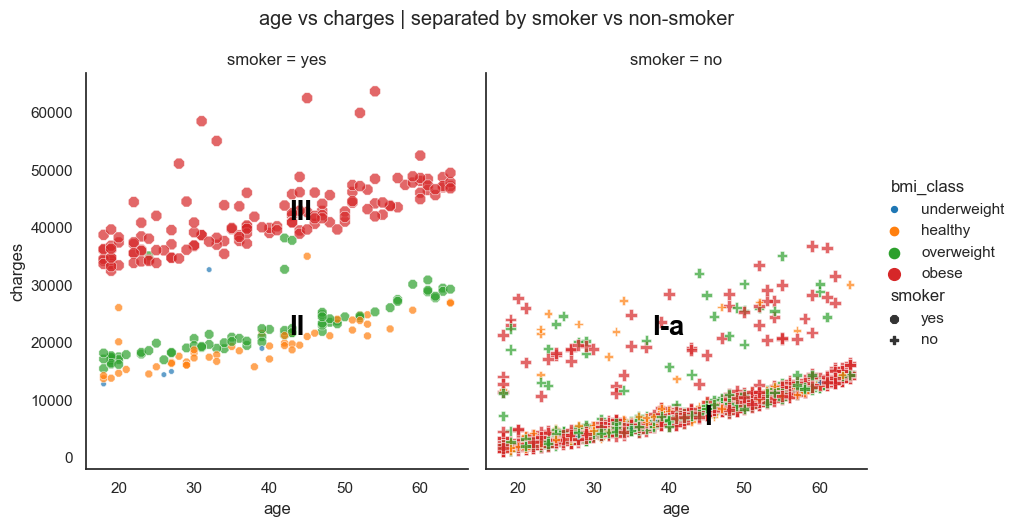

In [ ]:
g = (sns
.relplot
 (data=insurance,
  x='age',
  y='charges',
  hue='bmi_class',
  size='bmi_class',
  style='smoker',
  # legend='full',
  col='smoker',
  # col_wrap=1,
  # row='smoker',
  height=5, 
  aspect=0.9,
  markers=["8","P"],
  s=300,
  palette='tab10',
  alpha=0.7,
  size_order=['obese', 'overweight', 'healthy', 'underweight'],
 )
);

g.fig.text(0.7, 0.22, "I",
   color="black", fontdict=dict(size=20), fontweight='bold'
          )

g.fig.text(0.3, 0.4, "II",
   color="black", fontdict=dict(size=20), fontweight='bold'
          )

g.fig.text(0.3, 0.63, "III",
   color="black", fontdict=dict(size=20), fontweight='bold'
          )

g.fig.text(0.65, 0.4, "I-a",
   color="black", fontdict=dict(size=20), fontweight='bold'
          )


plt.suptitle('age vs charges | separated by smoker vs non-smoker', y = 1.05);

Berdasarkan grafik di atas, dapat dengan jelas ditarik kesimpulan sebagai berikut:

1. Terdapat korelasi yang kuat antara umur dan tagihan kesehatan seseorang. Semakin tua seseorang, akan semakin besar tagihan kesehatannya. 

2. Selain umur, faktor utama yang sangat berpengaruh adalah apakah seseorang tersebut perokok atau non-perokok. Dapat dilihat pada grafik di atas, bahwa terdapat dua tren tagihan yang lebih tinggi (grup II dan III) pada kelas perokok, dibandingkan kelas non-perokok yang jauh lebih rendah tagihannya.

3. Faktor kedua yang juga berpengaruh adalah berat badan. Seorang perokok dengan kelas BMI obese memiliki kecenderungan tagihan kesehatan yang lebih tinggi dibandingkan yang healthy. Namun BMI hanya akan berpengaruh cukup besar, ketika seseorang adalah perokok, bila non-perokok meskipun BMI nya obese, tagihannya akan relatif lebih rendah.

Tiga group/ kelas di atas (I, II, III) menggambarkan tren masing-masing grup tagihan kesehatan berdasarkan profil risiko mereka:

- Grup I: non-perokok, tagihan sekitar 1k-16k
> *Grup I-a: non-perokok, namun tagihan 16k-30k
- Grup II: perokok & BMI class health-overweight, tagihan sekitar 16k-30k
- Grup III: perokok dan BMI class obese, tagihan di atas 30k


_*Grup I-a ini termasuk outlier, yang masih belum bisa dijelaskan. Karena profil risikonya serupa dengan grup I, namun tagihannya berbeda dan lebih dekat dengan tagihan grup II_.

Untuk mempermudah ilustrasi, di bawah adalah pembagian profil risiko masing-masing pengguna ke dalam grup-grup tertentu.

![Diagram](diagram.png)

## 5. Pengujian Hipotesis

### 5.1. Apakah Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non-perokok?

Pengujian hipotesis menggunakan uji statistik. Pada 5.1., ada dua kejadian berupa:
1. Hipotesis:
- H0: tagihan kesehatan perokok lebih kecil/ sama dengan tagihan kesehatan non-perokok
- H1: tagihan kesehatan perokok lebih besar daripada tagihan kesehatan non-perokok

Berdasarkan hipotesis di atas, ini termasuk dalam **right-tailed/ upper-tailed test**.

2. Uji statistik:
Karena data insurance ini merupakan subset dari suatu populasi (tidak mungkin memiliki data dari semua orang perokok dan tagihan kesehatannya), maka yang digunakan adalah **t-test**.

3. Confidence Level diset di angka 95%, sehingga alpha=0.05

Sehingga:
- Null Hypothesis: H0: μ tagihan perokok ≤ μ tagihan non-perokok
- Alternative Hypothesis: H1: μ tagihan perokok > μ tagihan non-perokok
- Significance level: α=0.05
- Uji Pihak Kanan, stats uji  >  nilai kritis ; tolak h0
atau
- Untuk semua uji, pvalue < alpha ; tolak h0

In [ ]:
tagihan_perokok = insurance.query("smoker =='yes'").charges
tagihan_nonperokok = insurance.query("smoker =='no'").charges

In [ ]:
tagihan_perokok.var() == tagihan_nonperokok.var() 

False

In [ ]:
from scipy.stats import ttest_ind

alpha=0.05

stat, p = ttest_ind(
    a = tagihan_perokok, 
    b = tagihan_nonperokok, 
    equal_var=False, 
    alternative='greater'
) # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 32.7519, p-value = 0.0000


In [ ]:
# Pengambilan Keputusan
if p > alpha:
    print('Terima H0: Tagihan Perokok lebih kecil/sama dengan Non-Perokok') 
else:
    print('Tolak H0: Tagihan Perokok lebih besar daripada Non-Perokok')

Tolak H0: Tagihan Perokok lebih besar daripada Non-Perokok


> Secara statisik, tagihan perokok adalah **lebih besar** daripada non-perokok

### 5.2. Apakah Proporsi perokok laki-laki lebih besar dari perempuan?

1. Menentukan hipotesis:
- H0: proporsi perokok laki-laki $\leq$ perempuan
- H1: proporsi perokok laki-laki $>$ perempuan




In [ ]:
jumlah_perokok = insurance.query("smoker == 'yes'")
jumlah_perokok


,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
11,62,female,26.290,0,yes,southeast,27808.72510,overweight
14,27,male,42.130,0,yes,southeast,39611.75770,obese
19,30,male,35.300,0,yes,southwest,36837.46700,obese
23,34,female,31.920,1,yes,northeast,37701.87680,obese
...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,obese
1314,30,female,23.655,3,yes,northwest,18765.87545,healthy
1321,62,male,26.695,0,yes,northeast,28101.33305,overweight
1323,42,female,40.370,2,yes,southeast,43896.37630,obese


In [ ]:
jumlah_perokok_laki2 = jumlah_perokok.query("sex == 'male'")
jumlah_perokok_laki2

,age,sex,bmi,children,smoker,region,charges,bmi_class
14,27,male,42.130,0,yes,southeast,39611.75770,obese
19,30,male,35.300,0,yes,southwest,36837.46700,obese
29,31,male,36.300,2,yes,southwest,38711.00000,obese
30,22,male,35.600,0,yes,southwest,35585.57600,obese
34,28,male,36.400,1,yes,southwest,51194.55914,obese
...,...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,46718.16325,obese
1303,43,male,27.800,0,yes,southwest,37829.72420,overweight
1304,42,male,24.605,2,yes,northeast,21259.37795,healthy
1307,32,male,28.120,4,yes,northwest,21472.47880,overweight


In [ ]:
proporsi_perokok_laki2 = len(jumlah_perokok_laki2)/len(jumlah_perokok)
proporsi_perokok_laki2

0.5802919708029197

In [ ]:
proporsi_perokok_perempuan = 1-proporsi_perokok_laki2
proporsi_perokok_perempuan


0.4197080291970803

In [ ]:
import scipy.stats as stats
import math

# Menentukan jumlah kejadian ukuran sampel (n), 
# proporsi pada null hypothesis, dan proporsi sample
n = len(insurance)
p = proporsi_perokok_laki2
p_hat = proporsi_perokok_laki2+0.01

In [ ]:
# Hitung uji statistik
test_stat=(p_hat-p)/(math.sqrt((p*(1-p))/(n)))
print(test_stat)

0.7411927066451223


In [ ]:
# Nilai Critical Value berdasarkan critical Z-value dari Z-table dengan nilai alpha 0.05
#Import package
import scipy.stats as stats
z_crit=stats.norm.ppf(1-0.05)  # right-tailed test
print(z_crit)

1.6448536269514722


In [ ]:
# Menentukan aturan keputusan
if test_stat>z_crit:
    print("Tolak null hypothesis")
else:
    print("Gagal tolak null hypothesis")

Gagal tolak null hypothesis


Secara statistik, hasil menunjukkan gagal untuk menolak H0, sehingga secara statistik proporsi perokok laki-laki adalah lebih besar daripada perempuan.

### 5.3. Apakah Variansi tagihan kesehatan perokok dan non-perokok sama?

In [ ]:
insurance.groupby('smoker').charges.var().round()

smoker
no      35925420.0
yes    133207311.0
Name: charges, dtype: float64

Hipotesis:
- H0 : Tagihan kesehatan perokok dan non-perokok sama
- H1 : Tagihan kesehatan perokok dan non-perokok tidak sama

In [ ]:
import scipy.stats as stats
import math

# Menentukan sampel terbesar dan sampel terkecil
n = insurance.charges.count()
s = insurance.query("smoker=='yes'").charges.std()
sd = insurance.query("smoker=='no'").charges.std()

# Hitung uji statistik
chi_square = ((n-1)*(sd**2))/(s**2)
print(chi_square)

360.5829647660657


In [ ]:
# Nilai Critical Value berdasarkan critical f-value dari f-table dengan nilai alpha 0.05
import scipy.stats as stats
chi2_crit=stats.chi2.ppf(0.05, n-1)
print(chi2_crit)

1253.0955250731236


In [ ]:
# Menyatakan rejection decision
if chi_square<chi2_crit:
    print("Tolak null hypothesis")
else:
    print("Terima null hypothesis")

Tolak null hypothesis


> Variansi tagihan perokok tidak sama dengan tagihan non-perokok

### 5.4. Apakah tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada tagihan kesehatan dengan BMI di bawah 25?

- H0: tagihan BMI di atas 25 <= tagihan BMI di bawah 25
- H1: tagihan BMI di atas 25 > tagihan BMI di bawah 25

In [ ]:
tagihan_bmilebih25 = insurance.query("bmi>25").charges
tagihan_bmikurang25 = insurance.query("bmi<25").charges

In [ ]:
tagihan_bmikurang25.var() == tagihan_bmilebih25.var()

False

In [ ]:
from scipy.stats import ttest_ind

alpha=0.05

stat, p = ttest_ind(
    a = tagihan_bmilebih25,
    b = tagihan_bmikurang25, 
    equal_var=False, 
    alternative='greater'
) # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 5.9299, p-value = 0.0000


In [ ]:
# Pengambilan Keputusan
if p > alpha:
    print('Terima H0: tagihan BMI di atas 25 <= tagihan BMI di bawah 25') 
else:
    print('Tolak H0: tagihan BMI di atas 25 > tagihan BMI di bawah 25')

Tolak H0: tagihan BMI di atas 25 > tagihan BMI di bawah 25


### 5.5. Apakah tagihan kesehatan laki-laki lebih besar dari perempuan?

- H0: tagihan laki-laki <= tagihan perempuan
- H1: tagihan laki-laki > tagihan perempuan

In [ ]:
tagihan_laki2 = insurance.query("sex == 'male'").charges
tagihan_perempuan = insurance.query("sex == 'female'").charges

In [ ]:
tagihan_laki2.var() == tagihan_perempuan.var()

False

In [ ]:
from scipy.stats import ttest_ind

alpha=0.05

stat, p = ttest_ind(
    a = tagihan_laki2, 
    b = tagihan_perempuan, 
    equal_var=False, 
    alternative='greater'
) # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 2.1009, p-value = 0.0179


In [ ]:
# Pengambilan Keputusan
if p > alpha:
    print('Terima H0: tagihan laki-laki <= tagihan perempuan') 
else:
    print('Tolak H0: tagihan laki-laki > tagihan perempuan')

Tolak H0: tagihan laki-laki > tagihan perempuan


In [ ]:
insurance.groupby('sex').charges.mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

> Secara statistik, tagihan laki-laki lebih besar daripada perempuan

# Outcome Project

## 1. Short Report

Link: https://ariewjy.github.io/posts/03-project-insurance-cost-part-1/

## 2. Video Penjelasan Tentang Bayes Theorem

Link: https://youtu.be/Zdtwk_hAqIg

## 3. Link GITHUB

https://github.com/ariewjy/ariewjy.github.io/tree/main/posts/03-project-insurance-cost-part-1